In [8]:
import pandas as pd
import numpy as np
import pandas_datareader as pdr
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import os
import requests
import pickle

from config import ALL, TW0050, Tech, Fin

pd.set_option('display.max_columns', None)

In [2]:

stock_period = ('2010/01/01','2021/12/31')

# experiments
# Portfolio = ALL
Portfolio = TW0050


In [3]:
stock_df=[]
for stock in Portfolio['portfolio']: 
    try:
        print(f'Start Download {stock}')
        df = pdr.DataReader(str(stock)+'.TW', 'yahoo', start=stock_period[0], end=stock_period[1])
        df[stock] = df['Close']
        df['date'] = df.index
        stock_df.append(df[['date',stock]])
    except:
        print(f'  {stock} Download Fail')
    
df = pd.concat(stock_df,axis=1).drop(columns='date')
df.index = df.index.to_series().apply(lambda x : str(x).replace('-','')[:8])
df.index.name = 'DateTime'
name = Portfolio['name']
df = df.dropna()
df.to_csv(os.path.join('data',f'{name}.csv'))
df


Start Download 1101
Start Download 1216
Start Download 1301
Start Download 1303
Start Download 1326
Start Download 1402
Start Download 1590
Start Download 2002
Start Download 2207
Start Download 2303
Start Download 2308
Start Download 2317
Start Download 2324
Start Download 2327
Start Download 2330
Start Download 2357
Start Download 2379
Start Download 2382
Start Download 2395
Start Download 2408
Start Download 2409
Start Download 2412
Start Download 2603
Start Download 2609
Start Download 2615
Start Download 2801
Start Download 2880
Start Download 2881
Start Download 2882
Start Download 2884
Start Download 2885
Start Download 2886
Start Download 2887
Start Download 2891
Start Download 2892
Start Download 2912
Start Download 3008
Start Download 3034
Start Download 3045
Start Download 4904
Start Download 4938
Start Download 5880
Start Download 6415
Start Download 6505
Start Download 8046
Start Download 8454
Start Download 9910


,1101,1216,1301,1303,1326,1402,1590,2002,2207,2303,...,3034,3045,4904,4938,5880,6415,6505,8046,8454,9910
DateTime,,,,,,,,,,,,,,,,,,,,,
20140227,35.527622,45.899853,77.000000,64.900002,77.099998,30.613226,292.516510,25.196077,372.0,12.300000,...,139.0,91.099998,61.400002,40.700001,11.968054,48.399883,77.800003,36.799999,122.088654,48.116325
20140303,35.049507,45.310230,76.000000,64.199997,76.000000,30.613226,312.771271,25.098040,363.0,12.500000,...,146.0,89.500000,61.000000,40.799999,11.822102,51.737804,76.900002,36.000000,116.453796,49.063496
20140304,34.203613,45.083454,75.300003,64.099998,75.199997,30.132641,331.612915,24.901960,358.0,12.400000,...,139.0,89.099998,60.599998,40.450001,11.785614,55.284348,76.500000,36.200001,113.066612,48.684628
20140305,35.012730,45.355587,75.500000,64.300003,74.800003,30.228758,325.018341,24.852942,365.5,12.450000,...,140.5,89.400002,60.599998,41.299999,11.785614,59.143822,76.599998,36.400002,112.697220,49.442364
20140306,34.681728,45.899853,75.500000,64.000000,74.099998,30.372932,322.192078,25.049019,371.0,12.700000,...,140.5,89.699997,60.599998,41.500000,11.858590,63.211918,76.599998,36.450001,111.445030,49.189785
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20211224,43.548294,68.500000,104.000000,85.900002,80.400002,28.900000,984.000000,35.549999,610.0,64.300003,...,530.0,99.800003,63.900002,68.699997,25.049999,1200.000000,96.800003,567.000000,1367.768555,227.500000
20211227,43.730125,68.400002,104.500000,85.900002,80.699997,29.000000,1025.000000,35.250000,615.0,64.300003,...,531.0,99.900002,64.000000,69.000000,25.000000,1257.500000,97.099998,576.000000,1380.165283,229.000000
20211228,43.775581,68.699997,105.000000,86.000000,81.000000,29.150000,1025.000000,35.400002,615.0,64.699997,...,537.0,100.500000,64.300003,69.400002,25.350000,1262.500000,97.000000,572.000000,1384.297485,228.000000


In [11]:

name = Portfolio['name']
print(name)
train_year = ('2010','2020')
test_year = ('2021','2021')
data = pd.read_csv(f'data/{name}.csv',index_col=0)

data = pd.DataFrame(data, index=data.index, columns=data.columns)
display(data.head())
display(data.describe())

scalerfile = f'scaler/{name}_{train_year[0]}_{train_year[1]}_scaler.sav'
print(scalerfile)
scaler_ = StandardScaler()
scaler = scaler_.fit(data)
pickle.dump(scaler, open(scalerfile, 'wb'))
scaler = pickle.load(open(scalerfile, 'rb'))

portfolio_stock = []
data = data[portfolio_stock]

train = data.loc[f'{train_year[0]}0101':f'{train_year[1]}1231']
output_path = f'data/{name}_{train_year[0]}_{train_year[1]}.csv'
print('Train Data:',output_path)
train.to_csv(output_path)
test = data.loc[f'{test_year[0]}0101':f'{test_year[1]}1231']
output_path = f'data/{name}_{test_year[0]}_{test_year[1]}.csv'
print('Test Data:',output_path)
test.to_csv(output_path)

TW0050
scaler/TW0050_2010_2020_scaler.sav


,1101,1216,1301,1303,1326,1402,1590,2002,2207,2303,2308,2317,2324,2327,2330,2357,2379,2382,2395,2408,2409,2412,2603,2609,2615,2801,2880,2881,2882,2884,2885,2886,2887,2891,2892,2912,3008,3034,3045,4904,4938,5880,6415,6505,8046,8454,9910
DateTime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
20140227,35.527622,45.899853,77.000000,64.900002,77.099998,30.613226,292.516510,25.196077,372.0,12.30,167.999359,81.168831,20.500000,43.103031,108.0,291.5,90.000000,74.500000,143.973495,46.362232,10.30,92.000000,16.584648,27.324921,11.185770,13.150814,11.943123,38.500000,42.377720,9.515581,14.534350,23.993750,10.163489,16.148054,13.375331,188.0,1345.0,139.0,91.099998,61.400002,40.700001,11.968054,48.399883,77.800003,36.799999,122.088654,48.116325
20140303,35.049507,45.310230,76.000000,64.199997,76.000000,30.613226,312.771271,25.098040,363.0,12.50,166.503815,80.299164,20.500000,43.103031,108.0,288.5,87.199997,74.000000,142.845764,45.096039,10.15,91.699997,16.262171,26.904535,11.264822,13.150814,11.805846,38.136364,41.903694,9.415680,14.168706,23.696306,10.056505,15.900259,13.338280,185.0,1380.0,146.0,89.500000,61.000000,40.799999,11.822102,51.737804,76.900002,36.000000,116.453796,49.063496
20140304,34.203613,45.083454,75.300003,64.099998,75.199997,30.132641,331.612915,24.901960,358.0,12.40,162.515701,80.009277,20.100000,42.659180,107.5,288.0,86.000000,73.699997,142.845764,41.979252,10.05,91.300003,16.077896,26.589249,11.185770,13.039993,11.771526,37.818180,41.287464,9.340754,13.985884,23.498011,9.949521,15.858959,13.227128,186.0,1380.0,139.0,89.099998,60.599998,40.450001,11.785614,55.284348,76.500000,36.200001,113.066612,48.684628
20140305,35.012730,45.355587,75.500000,64.300003,74.800003,30.228758,325.018341,24.852942,365.5,12.45,168.996384,80.202538,20.150000,43.398933,110.0,283.0,88.900002,78.800003,142.469849,39.057259,10.10,91.900002,16.170033,26.694345,11.304347,13.003052,11.805846,37.954544,41.334866,9.390705,14.168706,23.498011,10.020844,15.941558,13.264178,188.0,1390.0,140.5,89.400002,60.599998,41.299999,11.785614,59.143822,76.599998,36.400002,112.697220,49.442364
20140306,34.681728,45.899853,75.500000,64.000000,74.099998,30.372932,322.192078,25.049019,371.0,12.70,170.990448,81.555351,20.299999,43.744152,113.0,284.5,91.500000,78.699997,146.228958,41.005253,10.20,92.300003,16.492512,26.904535,11.225296,13.039993,11.908804,38.181816,42.188110,9.315779,14.168706,23.646732,10.092166,16.271954,13.412381,198.0,1390.0,140.5,89.699997,60.599998,41.500000,11.858590,63.211918,76.599998,36.450001,111.445030,49.189785


,1101,1216,1301,1303,1326,1402,1590,2002,2207,2303,2308,2317,2324,2327,2330,2357,2379,2382,2395,2408,2409,2412,2603,2609,2615,2801,2880,2881,2882,2884,2885,2886,2887,2891,2892,2912,3008,3034,3045,4904,4938,5880,6415,6505,8046,8454,9910
count,1921.000000,1921.000000,1921.000000,1921.000000,1921.000000,1921.000000,1921.000000,1921.000000,1921.000000,1921.000000,1921.000000,1921.000000,1921.000000,1921.000000,1921.000000,1921.000000,1921.000000,1921.000000,1921.000000,1921.000000,1921.000000,1921.000000,1921.000000,1921.000000,1921.000000,1921.000000,1921.000000,1921.000000,1921.000000,1921.000000,1921.000000,1921.000000,1921.000000,1921.000000,1921.000000,1921.000000,1921.000000,1921.000000,1921.000000,1921.000000,1921.000000,1921.000000,1921.000000,1921.000000,1921.000000,1921.000000,1921.000000
mean,32.129186,63.656370,89.672410,71.455674,86.401458,28.410871,428.055687,24.705933,434.299063,20.095888,174.560893,98.540002,20.618428,265.231860,266.612181,276.149401,193.692140,67.537793,230.247042,63.153936,12.733654,105.939979,25.297392,25.515298,29.323454,15.774387,15.178885,45.666054,46.269798,15.972790,15.624445,26.747871,11.891466,19.384245,17.852436,265.508589,3497.423217,197.293857,105.297814,69.990630,69.802707,15.750008,252.506449,95.305362,87.474232,284.212758,129.515236
std,6.581850,9.786498,13.042657,8.605599,14.835522,3.036065,252.736392,4.268119,125.832594,14.867303,47.829256,17.746417,2.505217,205.593992,150.433276,45.052381,143.973989,11.794118,61.748719,16.989806,3.817411,6.803710,33.570945,32.444631,43.039714,2.344728,2.842193,9.615233,6.192800,5.208346,4.081693,3.485466,2.113865,2.398994,3.093312,35.752794,1008.582634,120.284877,6.335287,5.354287,12.557117,3.640543,278.137673,16.438609,123.757770,330.291651,48.027848
min,18.756819,45.083454,62.000000,47.299999,59.299999,20.500000,128.594208,16.750000,201.500000,10.050000,98.900002,66.300003,15.300000,39.848110,107.500000,170.500000,50.700001,47.500000,140.966217,30.365477,6.100000,90.300003,9.100000,4.730000,9.407114,11.369352,10.436267,31.681818,33.447113,8.991101,9.586538,19.250000,7.841185,13.425925,12.264178,185.000000,1345.000000,102.000000,89.099998,57.099998,40.450001,10.420225,47.375000,63.700001,21.799999,105.810165,48.116325
25%,26.700884,55.000000,77.800003,64.500000,73.199997,25.799999,251.253296,22.799999,349.500000,12.300000,143.000000,85.034012,18.850000,79.070625,148.500000,246.000000,100.500000,57.900002,187.632812,48.497028,10.100000,101.000000,12.004522,8.980000,13.122529,13.790624,12.725603,40.000000,41.099998,11.556920,12.644230,23.900000,10.174393,17.559187,14.826980,235.000000,2680.000000,120.000000,99.800003,65.300003,61.500000,12.369133,93.875000,80.400002,27.950001,131.793137,99.242424
50%,32.144039,65.099998,90.500000,71.500000,83.900002,28.850000,334.839539,24.450001,385.000000,14.050000,162.000000,98.750000,20.000000,250.392914,224.500000,275.000000,115.000000,64.300003,205.934738,62.680584,12.200000,108.000000,13.904814,14.545265,14.387351,15.301575,14.358476,43.181816,46.338188,13.884115,14.569772,25.900000,11.918602,19.549999,18.386299,268.000000,3455.000000,150.000000,106.500000,71.699997,68.599998,15.117781,140.500000,96.800003,38.700001,151.828201,117.803032
75%,36.538624,72.500000,101.000000,76.699997,95.000000,30.600000,511.000000,25.400000,534.000000,16.299999,189.933990,108.000000,21.900000,395.000000,299.000000,300.500000,233.500000,77.400002,264.578400,76.699997,13.650000,111.000000,16.900000,26.063770,19.011856,17.080326,17.731878,47.090908,50.568848,21.874479,17.644230,29.450001,12.822208,21.100000,20.627062,293.000000,4250.000000,204.000000,110.000000,74.000000,78.400002,19.362745,246.000000,107.000000,54.500000,199.098419,166.287872
max,50.639668,83.000000,118.000000,92.800003,128.500000,37.400002,1195.000000,45.000000,749.000000,70.000000,323.000000,151.875000,29.549999,1045.000000,673.000000,409.500000,613.000000,99.000000,400.500000,102.500000,33.349998,124.000000,224.000000,216.500000,265.612640,22.610434,21.25000

Train Data: data/TW0050_2010_2020.csv
Test Data: data/TW0050_2021_2021.csv


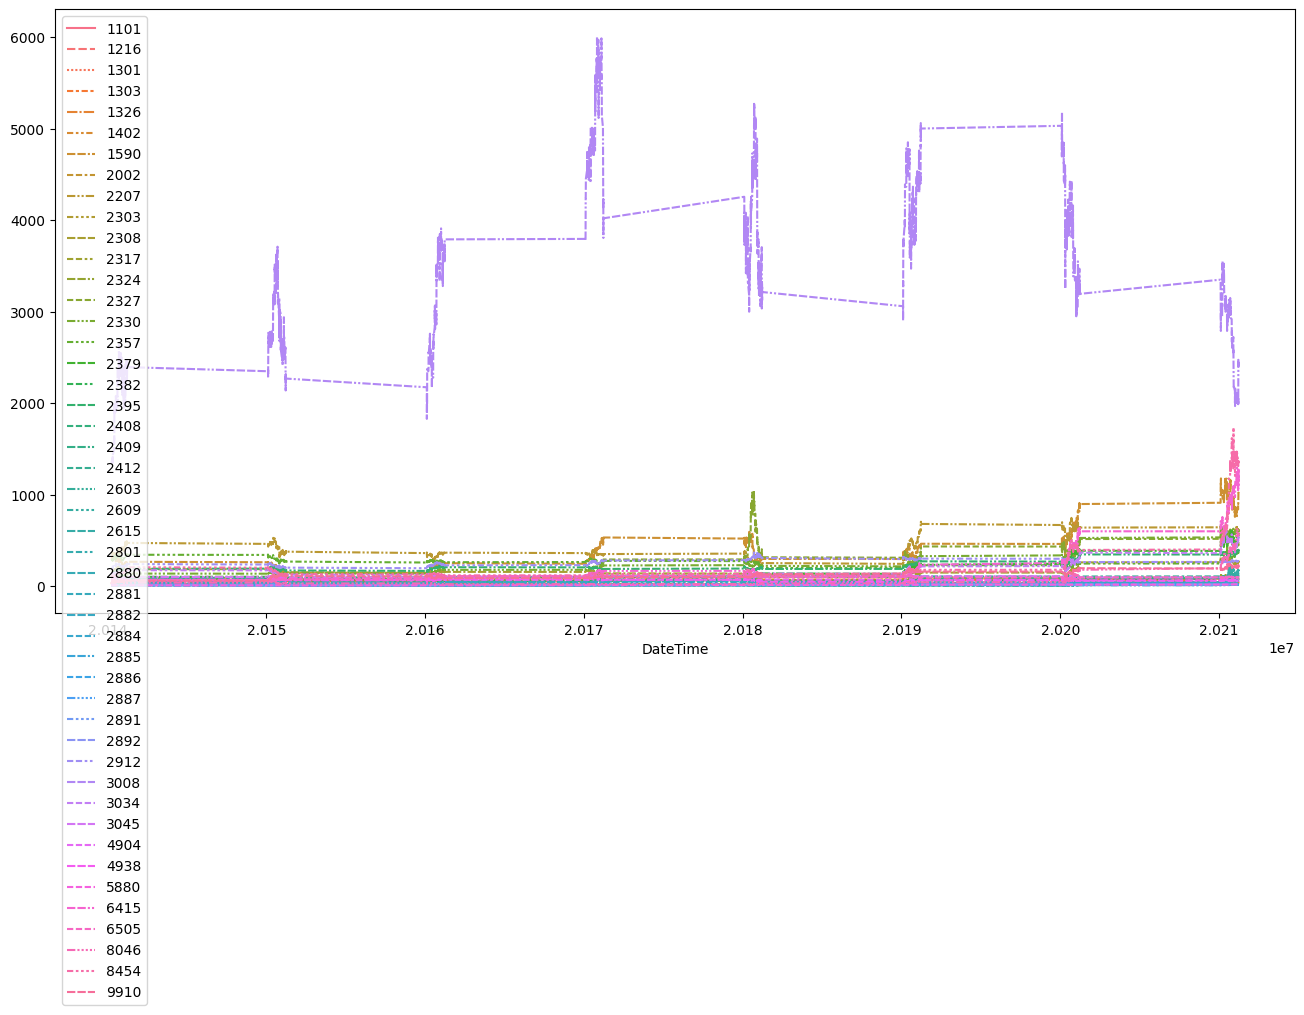

In [16]:

portfolio_stock = Portfolio['portfolio']
# portfolio_stock = ['1101','1216']
data_plot = data[portfolio_stock]
fig, ax = plt.subplots(1, 1, figsize=(16, 8), dpi=100)
sns.lineplot(data=data_plot, ax=ax)
plt.legend(loc='upper left')

In [6]:
url = "https://api.finmindtrade.com/api/v4/data"
parameter = {"dataset": "TaiwanStockInfo"}
translation = requests.get(url, params=parameter)
trans = translation.json()
df_info = pd.DataFrame(trans['data'])
drop_list = ['ETF', '上櫃指數股票型基金(ETF)','受益證券', '指數投資證券(ETN)', '其他', '所有證券 ', '存託憑證','Index', '大盤']
df_info = df_info[df_info['industry_category'].apply(lambda x : x not in drop_list)]
df_info['row'] = df_info.sort_values(['stock_id','industry_category'], ascending=[True,False]).groupby(['stock_id']).cumcount() + 1
df_info = df_info[df_info['row']==1]
df_info = df_info[['stock_id','stock_name','industry_category']]
df_info = df_info.rename(columns={'stock_id':'code','stock_name':'name','industry_category':'c_name'})
df_info = df_info[df_info['code'].apply(lambda x : x in Portfolio['portfolio'])]
df_info.to_csv(f'data/{name}_table.csv',index=False)
df_info

,code,name,c_name
303,1101,台泥,水泥工業
317,1216,統一,食品工業
339,1301,台塑,塑膠工業
340,1303,南亞,塑膠工業
359,1326,台化,塑膠工業
367,1402,遠東新,紡織纖維
468,1590,亞德客-KY,電機機械
597,2002,中鋼,鋼鐵工業
650,2207,和泰車,汽車工業
672,2303,聯電,電子工業
